In [1]:
%matplotlib inline

## Objective of this notebook: use a multiple layer perceptron to process MNIST dataset.


MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is. In this lab session, we're going to train a model to look at images and predict what digits they are.

First, start here with these lines of code which will download and read in the data automatically:

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

The MNIST data is split into two parts: 60,000 data points of training data, 10,000 points of test data. It's essential in machine learning that we have separate data which we don't learn from so that we can make sure that what we've learned actually generalizes!

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. "x" corresponds to images and "y" to labels. Both the training set and test set contain images and their corresponding labels.

First, we will visualize some of the data:

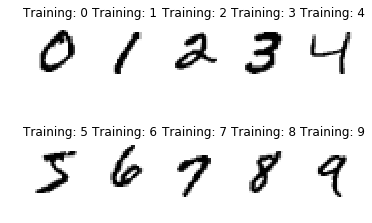

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.axis('off')
  index = np.where(y_train == i)[0][0]
  plt.imshow(x_train[index,:,:], cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('Training: %i' % y_train[index])
plt.show()

Each image is 28 pixels by 28 pixels. In this lab session, we flatten this array into a vector of 28x28 = 784 numbers.

#### 1) Write the code to flatten the data:

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#### 2) Write the code to normalize pixel intensity between 0 and 1 of images:

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Each image in MNIST has a corresponding label, a number between 0 and 9 representing the digit drawn in the image.

In this lab session, we're going to want our labels as "one-hot vectors". A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the $n^{th}$ digit will be represented as a vector which is 1 in the $n^{th}$ dimension. For example, 3 would be $[0,0,0,1,0,0,0,0,0,0]$. 

#### 3) Convert the labels to one-hot vectors (using the function "to_categorical" available in Keras):

In [6]:
num_classes = 10
z_train = tf.keras.utils.to_categorical(y_train, num_classes)
z_test = tf.keras.utils.to_categorical(y_test, num_classes)

### Softmax Regression

Every image in MNIST is of a handwritten digit between zero and nine. So there are only ten possible things that a given image can be. For a given image, we want to compute the probabilities for it being each digit. In this part, we will use a softmax regression model:

$$ y = softmax(Wx+b)$$

where $softmax$ is the normalized exponential function.

#### 4)  Define a Keras network architecture for softmax regression using Sequential API (https://keras.io/models/sequential/). Use a Dense layer to define the softmax regression (https://keras.io/layers/core/#dense).

The sequential Keras model is a linear stack of layers. You can create a sequential model by passing a list of layer instances to the constructor. Among the layer instances, you can use:
  - regular densely-connected layer using Dense (https://keras.io/layers/core/#dense)
  - Dropout (https://keras.io/layers/core/#dropout)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# remove deprecated warning for tensorflow 2.0
import logging
logging.getLogger('tensorflow').disabled = True


# y = softmax (Wx+b)
model = Sequential()
model.add(Dense(num_classes, activation='softmax', input_shape=(784,)))

#### 5) How many trainable parameters are there?

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


We now have to define the loss function. We try to minimize that error, and the smaller the error margin, the better our model is. In this lab session, "cross-entropy" is used as the loss of the model. It's defined as:

$$H_{y}(z) = - \sum_i y_i \log(z_i)$$

where $z$ is our predicted probability distribution, and $y$ is the true distribution (the one-hot vector with the digit labels). 

Now we need to specify the optimization algorithm that will be used to minimized the loss function. Here, we will use RMSprop. We will also specify a metric (here 'accuracy') to follow the convergence of the training step.

#### 6) Specify in the Keras model the loss function, the optimization algorithm and the metric (see https://keras.io/models/sequential/#compile):  

In [9]:

optimizer= tf.keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


#### 7) Write the code to train the model:

In [10]:
batch_size = 128
epochs = 20

history = model.fit(x_train, z_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, z_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6011 - acc: 0.8495 - val_loss: 0.3425 - val_acc: 0.9077
Epoch 2/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3312 - acc: 0.9082 - val_loss: 0.2995 - val_acc: 0.9174
Epoch 3/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3020 - acc: 0.9158 - val_loss: 0.2849 - val_acc: 0.9208
Epoch 4/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.2885 - acc: 0.9197 - val_loss: 0.2768 - val_acc: 0.9250
Epoch 5/20
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2805 - acc: 0.9220 - val_loss: 0.2734 - val_acc: 0.9240
Epoch 6/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.2748 - acc: 0.9236 - val_loss: 0.2701 - val_acc: 0.9235
Epoch 7/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.2708 - acc: 0.9247 - val_loss: 0.

To study the convergence of the training step, we will plot the evolution of the accuracy for both training and testing data with respect to the epochs. The code to do this is provided below.

#### 8) Study the convergence figure and the evaluation score.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


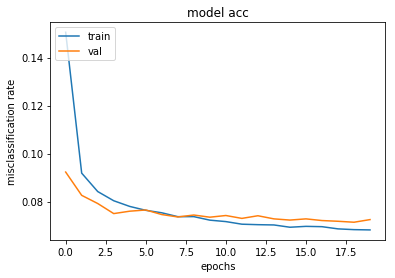

Test cross-entropy loss: 0.27241230171471836
Test misclassification rate: 0.07249999046325684
Test accuracy: 0.9275


In [11]:
# list all data in history
print(history.history.keys())

#Visualize history (loss vs epochs)
plt.figure()
plt.plot(1-np.asarray(history.history['acc']))
plt.plot(1-np.asarray(history.history['val_acc']))
plt.title('model acc')
plt.ylabel('misclassification rate')  
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')
plt.show()

score = model.evaluate(x_test, z_test, verbose=0)
print('Test cross-entropy loss:', score[0])
print('Test misclassification rate:', 1-score[1])
print('Test accuracy:', score[1])


Is that good? Compare your results with the score of the current best models: https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results

#### 9) Write code to visualize the incorrect predictions:

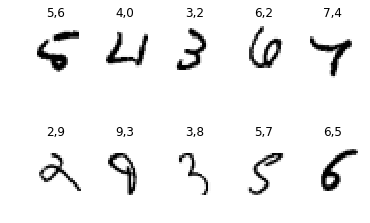

In [12]:
z_pred = model.predict(x_test)


y_pred = np.argmax(z_pred,axis=1)
index = np.where(y_pred - y_test != 0)
im_test = x_test.reshape(10000, 28, 28)

plt.figure()
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.axis('off')
  plt.imshow(im_test[index[0][i],:,:], cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title(str(y_test[index[0][i]])+','+str(y_pred[index[0][i]]) )
plt.show()

#### 10) Study the confusion matrix:

Normalized confusion matrix


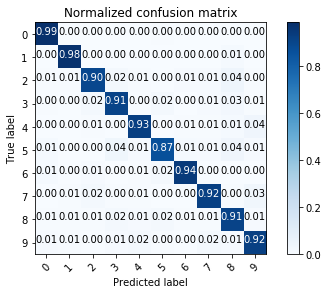

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

class_names= ['0','1','2','3','4','5','6','7','8','9']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Multiple layer network

#### 9) Build a multiple layer dense network to reach 98% of accuracy (at least!).

(10000, 784)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [===========================

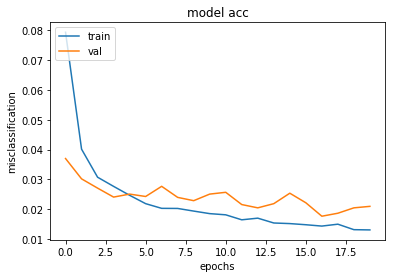

Test cross-entropy loss: 0.11746951825460043
Test misclassification rate: 0.021000027656555176
Test accuracy: 0.979


In [14]:
from tensorflow.keras.layers import Dropout

print(x_test.shape)

model = Sequential()
model.add(Dense(512, activation=None, input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit(x_train, z_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, z_test))
score = model.evaluate(x_test, z_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#Visualize history (loss vs epochs)
plt.figure()
plt.plot(1-np.asarray(history.history['acc']))
plt.plot(1-np.asarray(history.history['val_acc']))
plt.title('model acc')
plt.ylabel('misclassification')  
plt.xlabel('epochs')
plt.legend(['train','val'], loc='upper left')
plt.show()

score = model.evaluate(x_test, z_test, verbose=0)
print('Test cross-entropy loss:', score[0])
print('Test misclassification rate:', 1-score[1])
print('Test accuracy:', score[1])